<a href="https://colab.research.google.com/github/Oussoubicodes/CS4116/blob/main/CS4287_Assign2_20231717_20242905.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ameeen Popoola - 20231717 -- Oussoubi Niakate - 20242905
#Runs with no errors till the end
#https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

In [ ]:
#Imports
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



#!unzip archive.zip

from keras import optimizers
from keras.optimizers import Adam
from keras.models import Sequential,Model,load_model
from keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, add, Activation

from keras.layers import BatchNormalization

from keras import applications

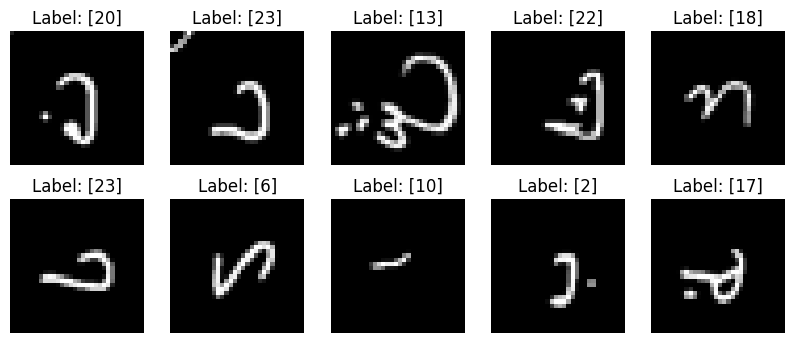

Number of unique labels: 28


In [ ]:
# Load the data
X_train = pd.read_csv("csvTrainImages 13440x1024.csv").values
y_train = pd.read_csv("/content/csvTrainLabel 13440x1.csv").values
X_test = pd.read_csv("csvTestImages 3360x1024.csv").values
y_test = pd.read_csv("csvTestLabel 3360x1.csv").values

# Visualize Random Images from Dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    random_index = random.randint(0, len(X_train) - 1)
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[random_index].reshape(32, 32), cmap='gray')
    plt.title(f"Label: {y_train[random_index]}")
    plt.axis('off')
plt.show()

unique_labels = np.unique(y_train)
num_labels = len(unique_labels)

print(f"Number of unique labels: {num_labels}")

##Preprocessing(Normalisation) of the data

In [ ]:
#Converting Data to Float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalize Image Vectors
X_train /= 255
X_test /=255

# Convert training and test labels to one hot matrices
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Reshaping for CNN
X_train = X_train.reshape(X_train.shape[0], 32,32,1)
X_test = X_test.reshape(X_test.shape[0], 32,32,1)

In [ ]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 13439
number of test examples = 3359
X_train shape: (13439, 32, 32, 1)
Y_train shape: (13439, 29)
X_test shape: (3359, 32, 32, 1)
Y_test shape: (3359, 29)


### Creating Network Architecture

In [ ]:
#Setting Dimensions For Images
img_height,img_width = 32,32

#Number of Classes
num_classes = 29

# Set input shape
input_shape = (img_height, img_width, 1)
#Defining The Model
inputs = Input(shape=input_shape)

# Initial Convolutional Block
x = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Residual Blocks
for _ in range(2):
    residual = x
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = add([x, residual])
    x = Activation('relu')(x)

#Average Pooling to Reduce Spatial Dimensions
x = GlobalAveragePooling2D()(x)

#Fully Connected Layers

#Dropout Regularization
x = Dropout(0.7)(x)
#Batch Normalization Layer
x = BatchNormalization()(x)
#Output Layer
predictions = Dense(num_classes, activation= 'softmax')(x)

model = Model(inputs=inputs, outputs=predictions, name='resnet8')

#Compiling Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])

#Training Model
resHistory = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
210/210 [==============================] - 16s 16ms/step - loss: 3.1150 - accuracy: 0.1068 - val_loss: 2.9804 - val_accuracy: 0.2915
Epoch 2/100
210/210 [==============================] - 3s 14ms/step - loss: 2.1512 - accuracy: 0.3377 - val_loss: 1.5279 - val_accuracy: 0.7862
Epoch 3/100
210/210 [==============================] - 3s 13ms/step - loss: 1.4671 - accuracy: 0.5540 - val_loss: 0.7892 - val_accuracy: 0.8508
Epoch 4/100
210/210 [==============================] - 3s 13ms/step - loss: 1.1497 - accuracy: 0.6549 - val_loss: 0.5171 - val_accuracy: 0.9169
Epoch 5/100
210/210 [==============================] - 3s 12ms/step - loss: 0.9589 - accuracy: 0.7126 - val_loss: 0.3714 - val_accuracy: 0.9399
Epoch 6/100
210/210 [==============================] - 3s 13ms/step - loss: 0.8319 - accuracy: 0.7489 - val_loss: 0.3255 - val_accuracy: 0.9318
Epoch 7/100
210/210 [==============================] - 3s 14ms/step - loss: 0.7620 - accuracy: 0.7655 - val_loss: 0.2867 - val_accuracy

##Results

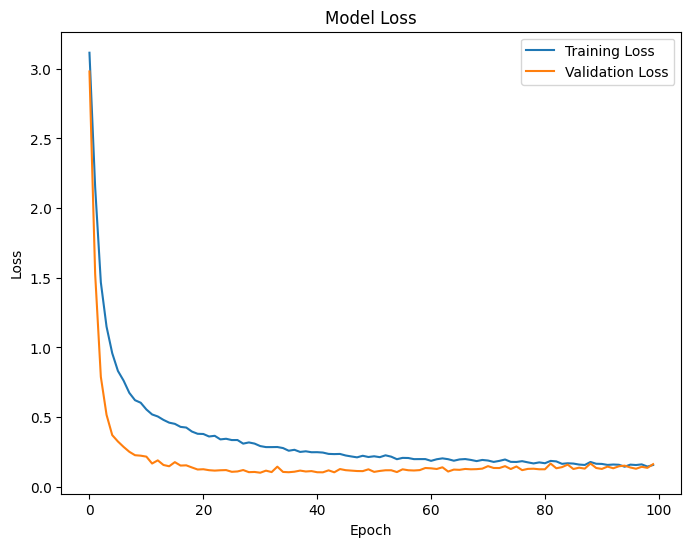

In [ ]:
# Plotting training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(resHistory.history['loss'], label='Training Loss')
plt.plot(resHistory.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

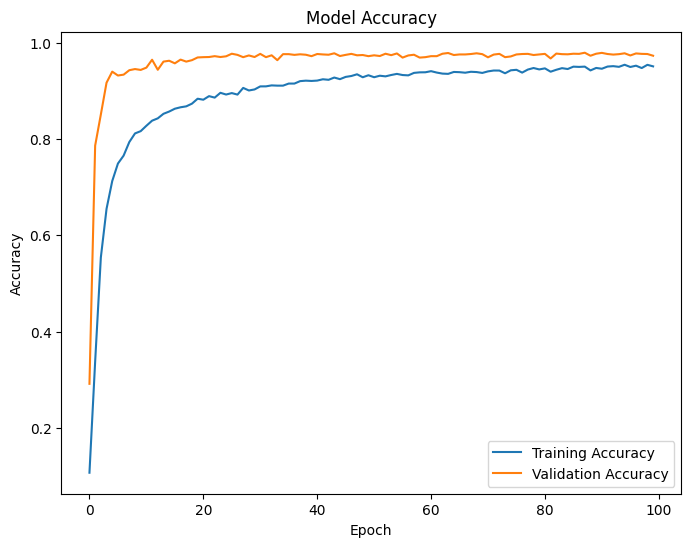

In [ ]:
# Plotting training & validation accuracy values
plt.figure(figsize=(8, 6))
plt.plot(resHistory.history['accuracy'], label='Training Accuracy')
plt.plot(resHistory.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

105/105 [==============================] - 1s 8ms/step


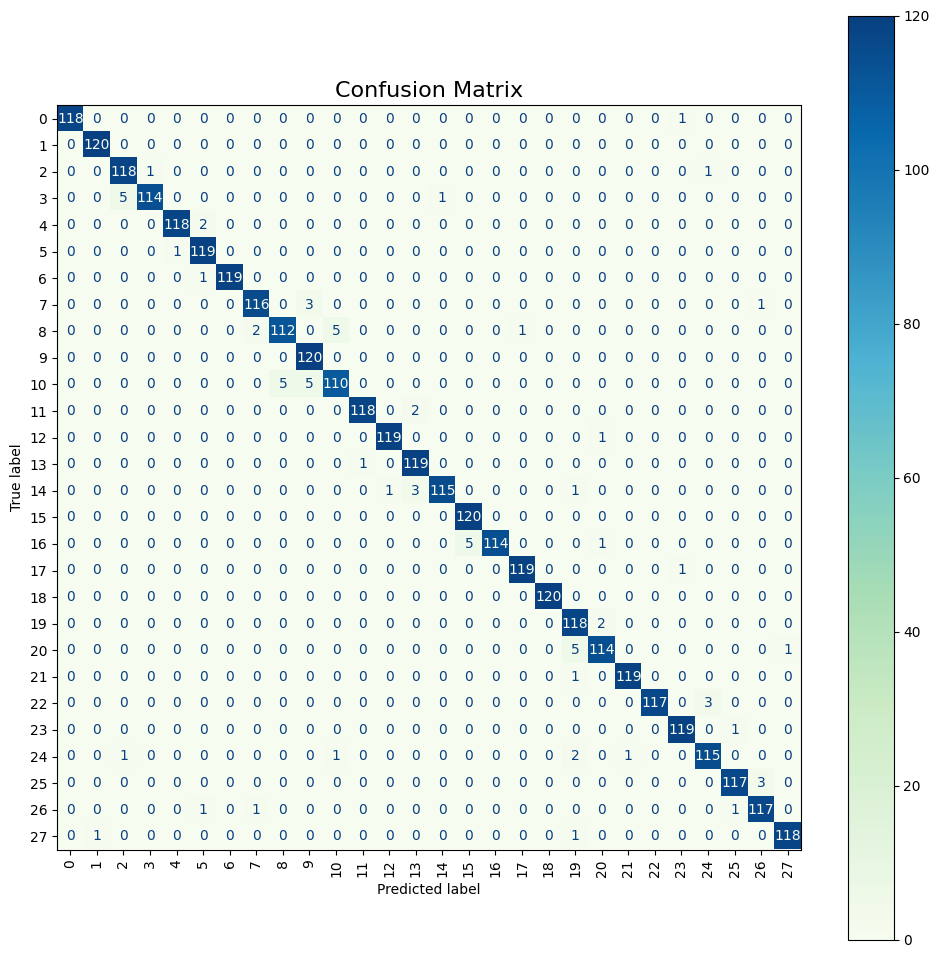


Test Accuracy: 97.71%
Test Loss: 0.1643


In [ ]:

# Displaying confusion matrix
y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
classes = [str(i) for i in range(28)]
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Resize the figure for better visualization
plt.figure(figsize=(12, 12))

# Adjusting the font size
matrix.plot(cmap='GnBu', values_format=".0f", xticks_rotation='vertical', ax=plt.gca())
plt.title('Confusion Matrix', fontsize=16)
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Print the test accuracy
print('')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Print the test loss
print(f'Test Loss: {test_loss:.4f}')

In [ ]:
model.summary()

Model: "resnet8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 32, 32, 64)           640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 32, 32, 64)           36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)           0         ['conv2d_1[0][0]']            
 D)                                                                                         

Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# K for the K-Fold cross validation
k = 10

# Initialising Cross Validator
kf = KFold(n_splits=k, shuffle=True)

accuracies = []

# Loops through each fold
for train_index, test_index in kf.split(X_train, y_train):
    # K-Fold Validation
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Training the model
    model.fit(X_train_fold, y_train_fold, batch_size=128, validation_split=0.2)

    # Make predictions on the test set
    y_pred_prob = model.predict(X_test_fold)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Evaluates accuracy and stores it
    score = accuracy_score(y_test_fold, y_pred)
    accuracies.append(score)

    print(f"Accuracy: {score}")

print(f"Average accuracy: {np.mean(accuracies)}")

42/42 [==============================] - 0s 3ms/step
Accuracy: 0.9992559523809523
42/42 [==============================] - 0s 2ms/step
Accuracy: 0.9992559523809523
42/42 [==============================] - 0s 2ms/step
Accuracy: 1.0
42/42 [==============================] - 0s 2ms/step
Accuracy: 0.9992559523809523
42/42 [==============================] - 0s 2ms/step
Accuracy: 0.9977678571428571
42/42 [==============================] - 0s 2ms/step
Accuracy: 0.9992559523809523
42/42 [==============================] - 0s 3ms/step
Accuracy: 0.9962797619047619
42/42 [==============================] - 0s 2ms/step
Accuracy: 0.9992559523809523
42/42 [==============================] - 0s 2ms/step
Accuracy: 1.0
42/42 [==============================] - 0s 3ms/step
Accuracy: 0.9977661950856291
Average accuracy: 0.998809357603801


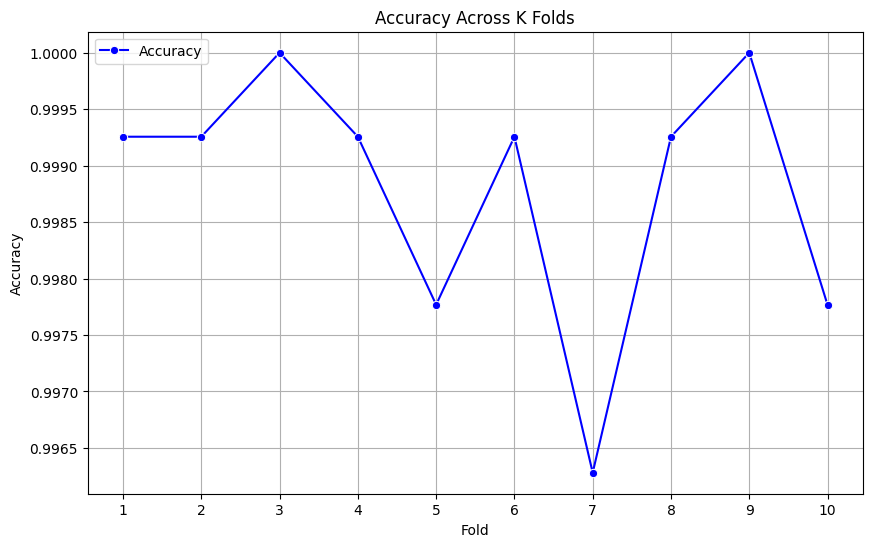

In [ ]:
import seaborn as sns


# Plotting the accuracies
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(range(1, k+1)), y=accuracies, marker='o', color='b', label='Accuracy')
plt.title('Accuracy Across K Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(list(range(1, k+1)))  # Set x-axis ticks to fold numbers
plt.grid(True)
plt.legend()
plt.show()